In [2]:
import sys
import os
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Add parent directory to path to locate src modules
current_dir = os.getcwd()
parent_dir = os.path.abspath(os.path.join(current_dir, '../../'))
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

from src.image_processing import apply_clahe, equalize_v_channel
from src.visualization import compare_results, plot_histogram

# Configure matplotlib
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)

In [3]:
def compensate_red_channel(image):
    """
    Compensates for red light absorption in water using the green channel.
    Formula: New_Red = 0.7 * Old_Red + 0.3 * Green
    """
    b, g, r = cv.split(image)
    r_boosted = cv.addWeighted(r, 0.7, g, 0.3, 0)
    return cv.merge([b, g, r_boosted])

Found 890 images in under_water

Processing: 100_img_.png


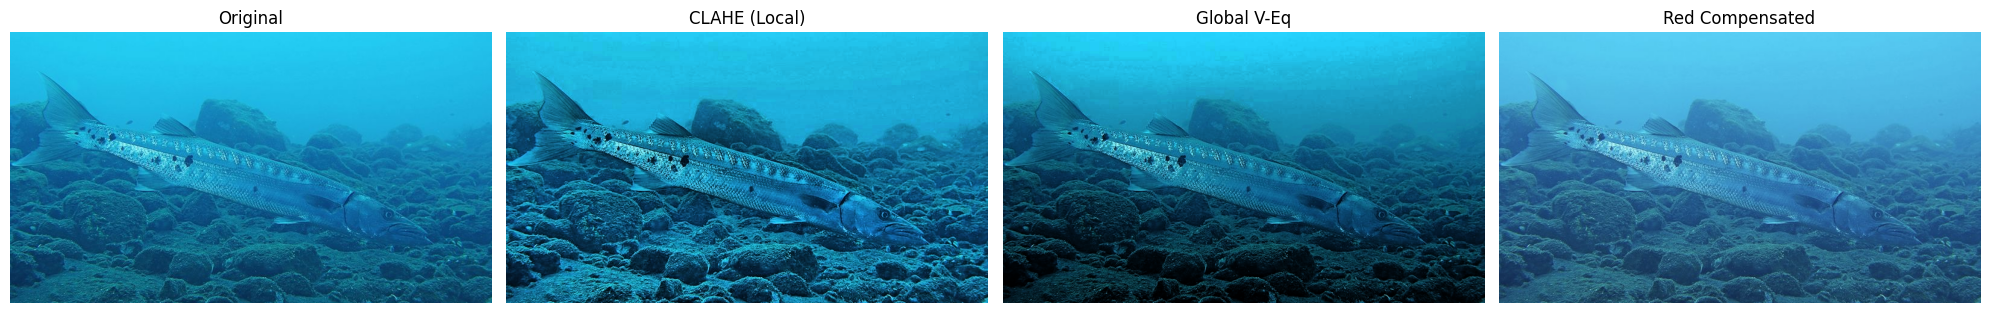

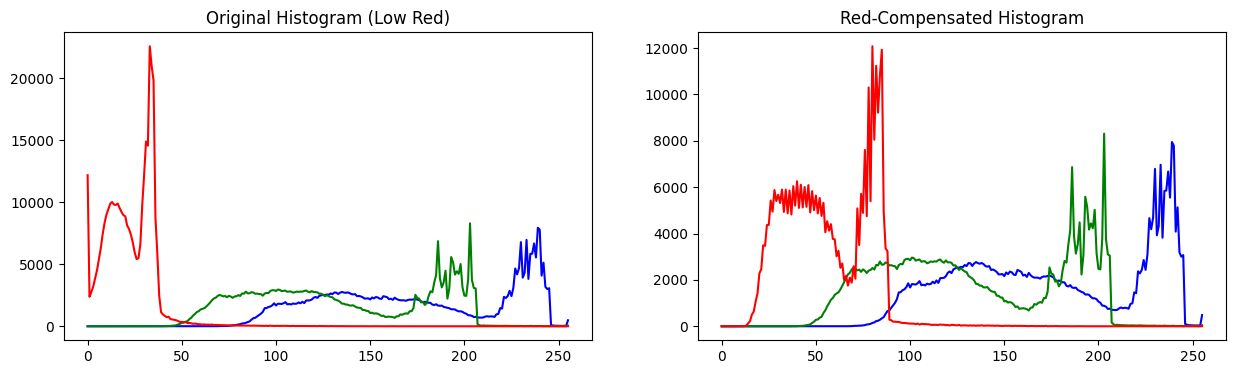


Processing: 10139.png


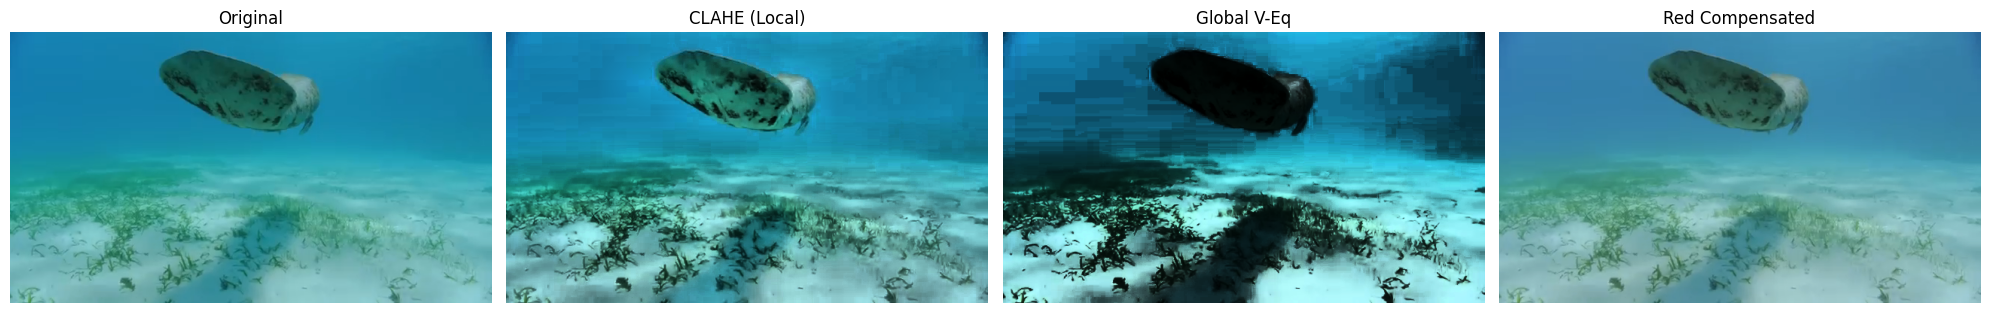

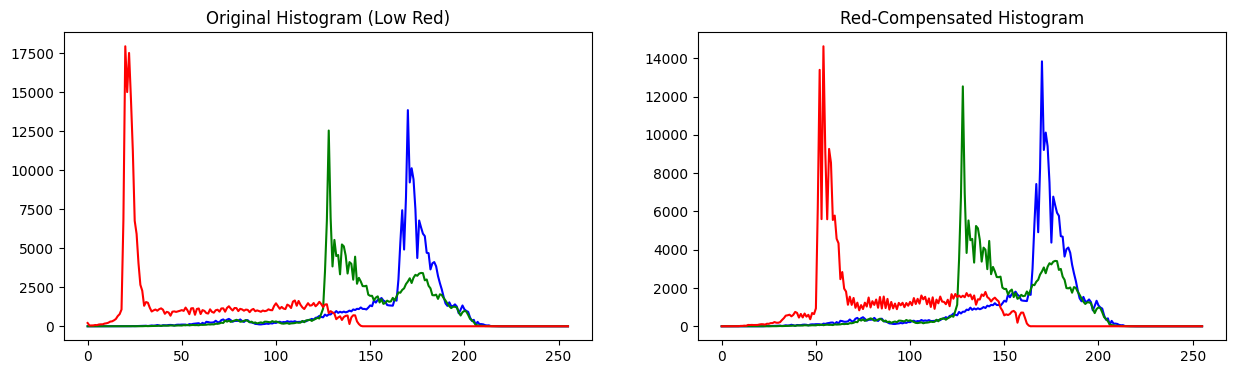


Processing: 10151.png


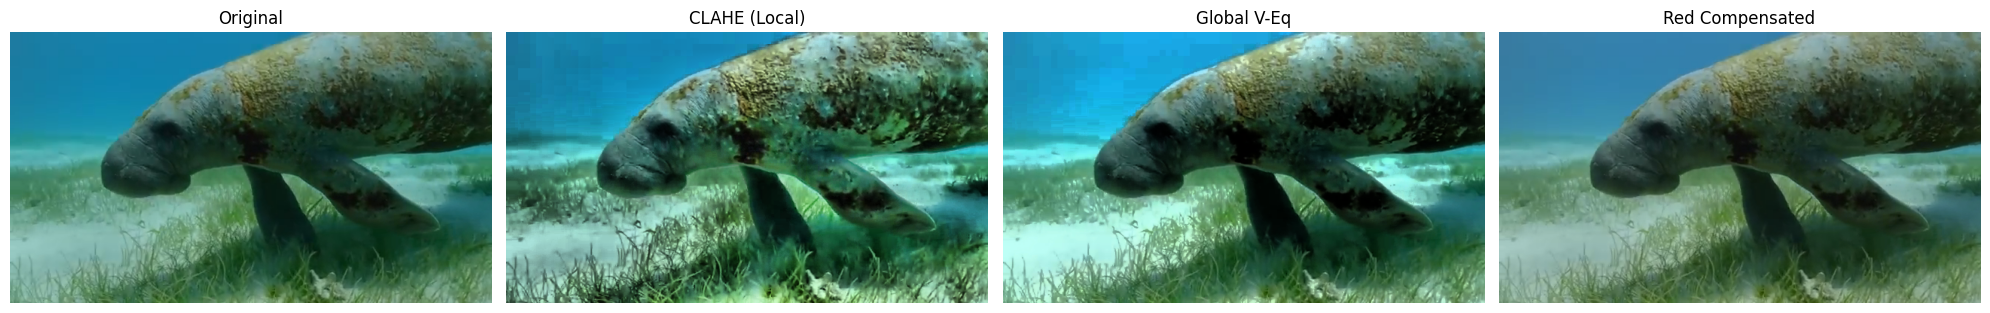

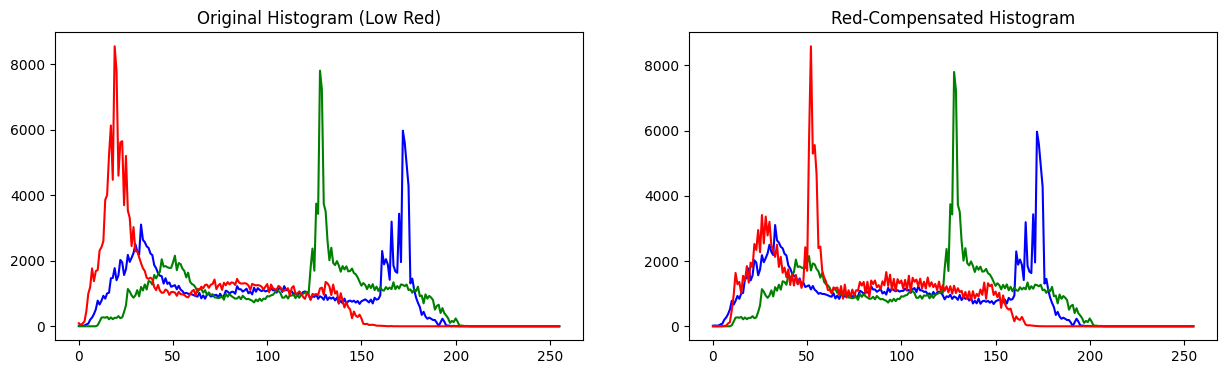


Processing: 101_img_.png


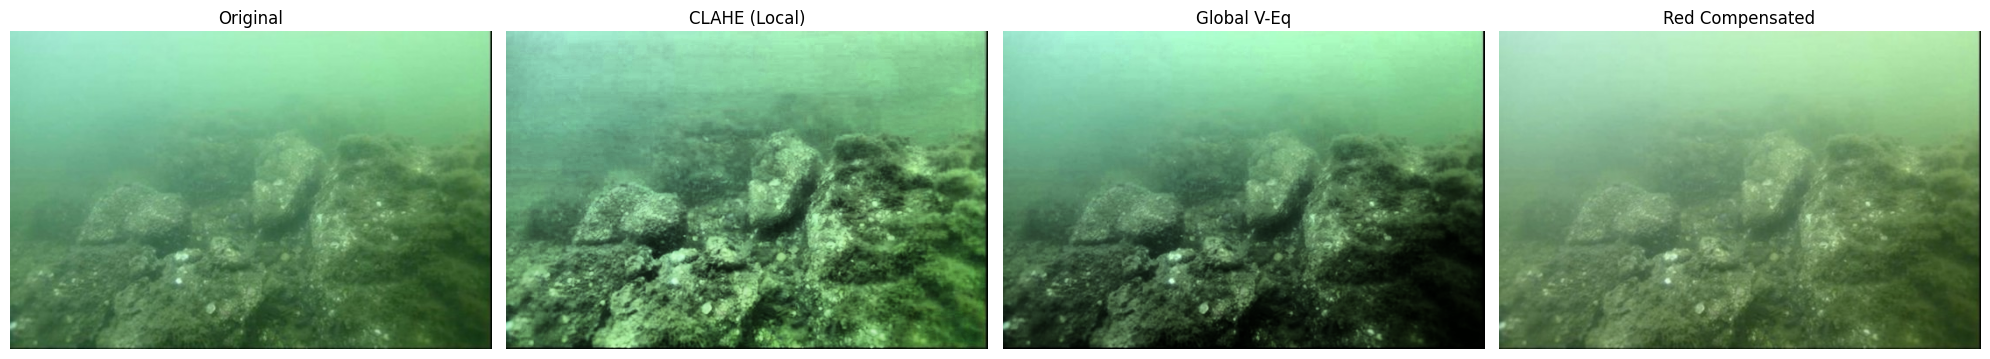

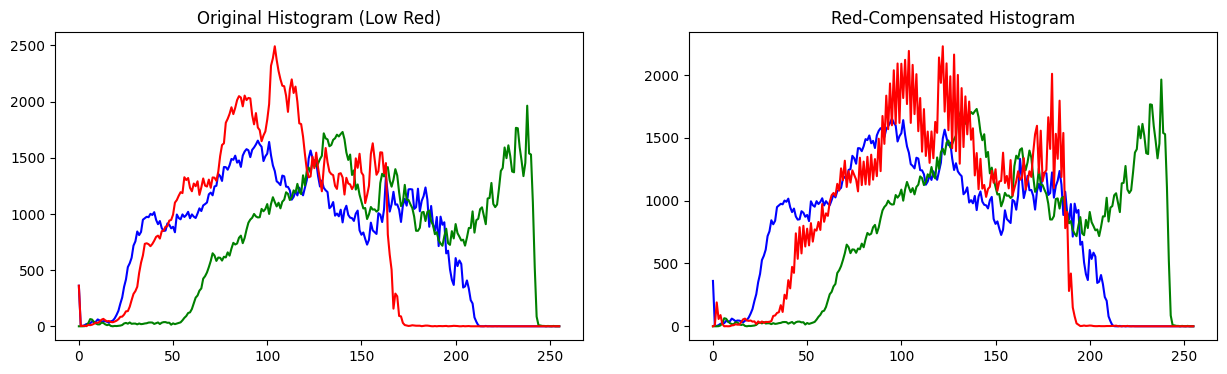


Processing: 102_img_.png


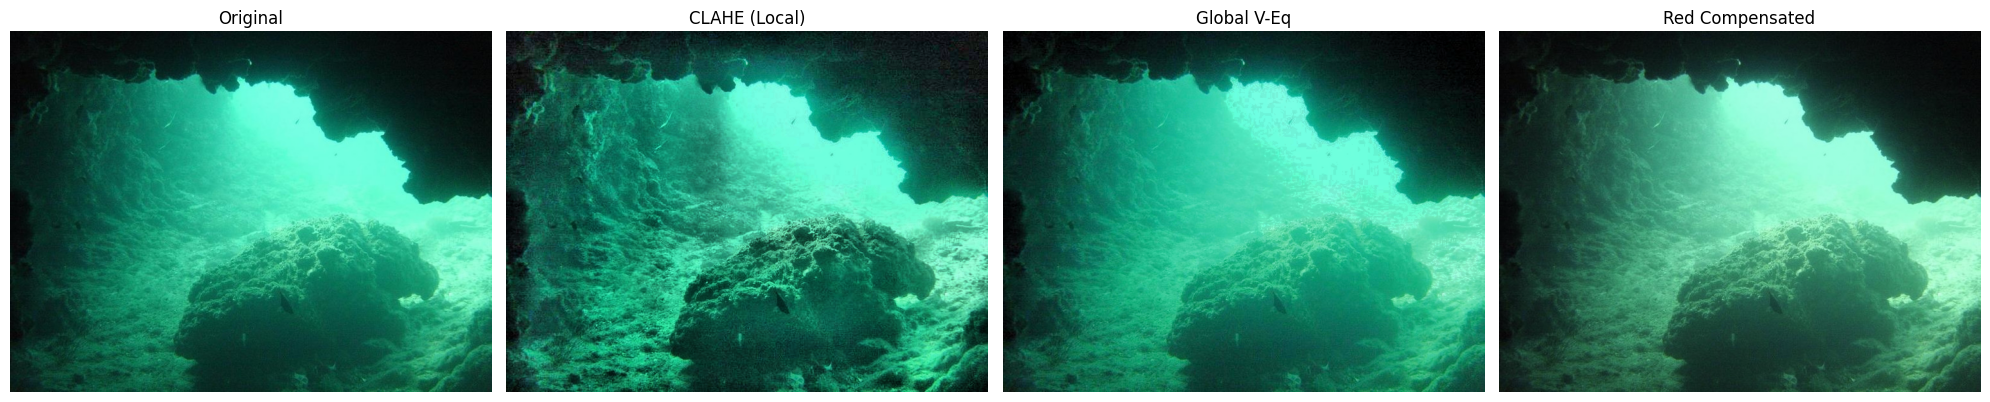

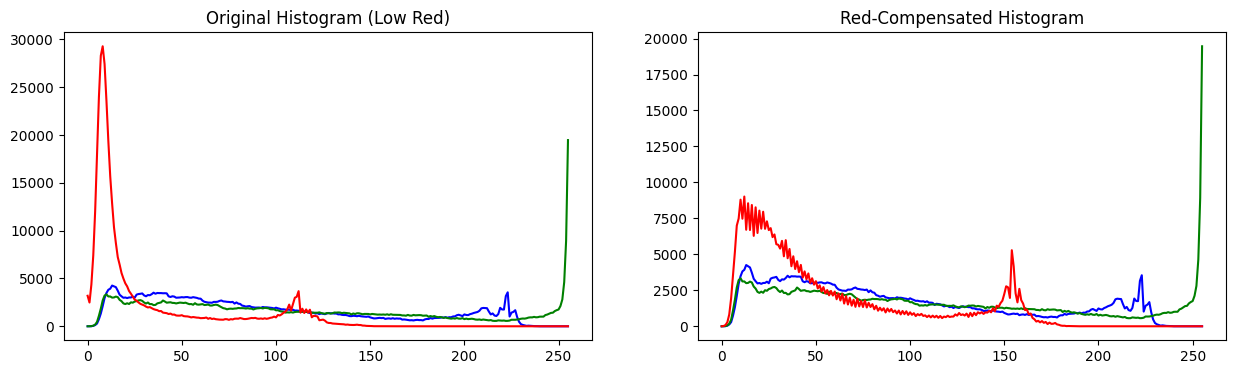

In [5]:
# specific dataset path
INPUT_DIR = Path('../../images/under_water')

if not INPUT_DIR.exists():
    print(f"Error: {INPUT_DIR} does not exist.")
else:
    # Get all valid images
    valid_exts = {'.jpg', '.jpeg', '.png', '.bmp', '.tif', '.tiff'}
    image_files = [f for f in INPUT_DIR.iterdir() if f.suffix.lower() in valid_exts]
    
    print(f"Found {len(image_files)} images in {INPUT_DIR.name}")

    # Process first 5 images
    for img_path in image_files[:5]:
        original = cv.imread(str(img_path))
        if original is None: continue

        # 1. Apply CLAHE (Contrast Limited Adaptive Histogram Equalization)
        clahe_img = apply_clahe(original, clip_limit=3.0, tile_grid=(8,8))

        # 2. Apply Global Histogram Equalization on V Channel
        global_eq = equalize_v_channel(original)

        # 3. Apply Red Channel Compensation
        red_fixed = compensate_red_channel(original)

        # 4. Visualization: Compare all methods
        print(f"\nProcessing: {img_path.name}")
        compare_results(
            [original, clahe_img, global_eq, red_fixed],
            ["Original", "CLAHE (Local)", "Global V-Eq", "Red Compensated"],
            figsize=(20, 5)
        )

        # 5. Visualization: Histogram Analysis
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
        
        # Plot Original Histogram
        for i, col in enumerate(['b', 'g', 'r']):
            hist = cv.calcHist([original], [i], None, [256], [0, 256])
            ax1.plot(hist, color=col)
        ax1.set_title("Original Histogram (Low Red)")

        # Plot Red-Compensated Histogram
        for i, col in enumerate(['b', 'g', 'r']):
            hist = cv.calcHist([red_fixed], [i], None, [256], [0, 256])
            ax2.plot(hist, color=col)
        ax2.set_title("Red-Compensated Histogram")
        
        plt.show()